In [1]:
#!pip install tensorflow==1.15
#!pip install tensorflow-gpu==1.15

In [1]:
import tensorflow
from tensorflow import keras
from scipy import ndimage # pré processamento de imagens:  http://scipy-lectures.org/advanced/image_processing/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist # importando o dataset com as imagens
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data() # dados de treino e teste
len(imagens_treino)

60000

In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

In [6]:
len(identificacoes_treino)

60000

In [7]:
len(identificacoes_teste)

10000

In [3]:
## Para visualizar as imagens vamos importar o matplotlib

import matplotlib.pyplot as plt

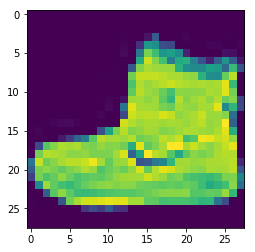

In [9]:
plt.imshow(imagens_treino[0])

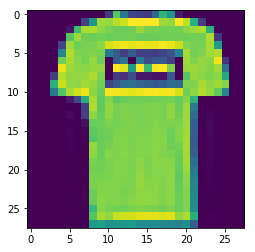

In [10]:
plt.imshow(imagens_treino[1])

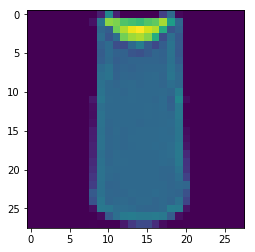

In [11]:
plt.imshow(imagens_treino[2])

## Identificando as imagens

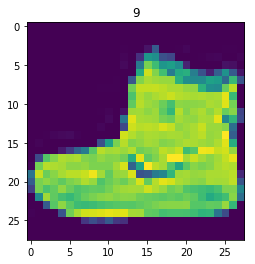

In [12]:

plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0])

In [14]:
identificacoes_treino.min()

0

In [15]:
identificacoes_treino.max()

9

In [20]:
total_de_classificacoes = 10
nome_de_classificacoes =['Camiseta',
'Calça',
'Pullover',
'Vestido',
'Casaco',
'Sandália',
'Camiseta',
'Tênis',
'Bolsa',
'Bota']

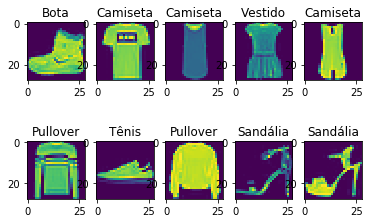

In [21]:

for imagem in range(10):
    plt.subplot(2,5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])

## Verificar na documentação o significado de cada titulo :      https://github.com/zalandoresearch/fashion-mnist

modelo = Sequencia(1,2,3)
    #1-entrada ( camada '0' --> achatamento das dimensoes para apenas uma)
    #2-processamento ( camada'1' multiplo de 2 --> quantidade de linhas conectadas as nossas camadas, e como vão ser feitos esses processamentos)
    #3-saida ( determina a quantidade de respostas e a probabilidade maxima da resmosta correta)

In [29]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  # criando o modelo

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy') #compilando o modelo

modelo.fit(imagens_treino,identificacoes_treino) #treinando o modelo

Train on 60000 samples
60000/60000 [==============================] - 6s 103us/sample - loss: 3.5003


## Modelo foi treinado.. em um cliclo ou época

## Vamos fazer tratamentos para diminuir a perda em cada camada

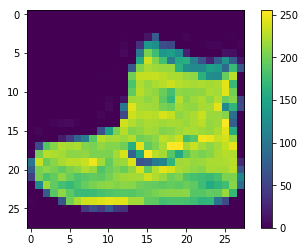

In [33]:
total_de_classificacoes = 10
nome_de_classificacoes =['Camiseta',
'Calça','Pullover','Vestido','Casaco','Sandália',
'Camiseta','Tênis','Bolsa','Bota']

'''plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

for imagem in range(10):
    plt.subplot(2,5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])
'''    
plt.imshow(imagens_treino[0])
plt.colorbar()

## camada '0' - Vamos dividir a quantidade de pixel pela variação de degrade das cores para aprimorar nossa precisão

In [34]:
imagens_treino = imagens_treino/float(255) # Normalização da imagem

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy') 

modelo.fit(imagens_treino,identificacoes_treino) 

Train on 60000 samples
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4868


### conseguimos diminuir a nossa perda

## camada '1' - 

In [39]:
imagens_treino = imagens_treino/float(255) # Normalização da imagem

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dense(128,activation=tensorflow.nn.relu), # add mais uma camada, ela procura agrupar as caracteristicas
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy') 

modelo.fit(imagens_treino,identificacoes_treino) 

Train on 60000 samples
60000/60000 [==============================] - 6s 95us/sample - loss: 0.7971


### nossa perta aumentou ao add mais uma camada

In [42]:
imagens_treino = imagens_treino/float(255) # Normalização da imagem

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dense(128,activation=tensorflow.nn.relu),# add camada
    keras.layers.Dense(64,activation=tensorflow.nn.relu),# add mais uma camada
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy') 

modelo.fit(imagens_treino,identificacoes_treino) 

Train on 60000 samples
60000/60000 [==============================] - 5s 91us/sample - loss: 2.3028


### nossas perdas aumentaram ainda mais ao add mais uma camada, podemos concluir que para o nosso modelo.. com a penas uma camada existe menos perda

In [3]:
imagens_treino = imagens_treino/float(255) # Normalização da imagem

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy']) # variavel para saber o quanto estamos acertando 

historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2) # vamos aumentar a quantidade de vezes que o algoritimo passa pelas imagens 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 77us/sample - loss: 0.5001 - acc: 0.8247 - val_loss: 0.4104 - val_acc: 0.8572
Epoch 2/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3734 - acc: 0.8650 - val_loss: 0.3658 - val_acc: 0.8663
Epoch 3/5
48000/48000 [==============================] - 4s 85us/sample - loss: 0.3339 - acc: 0.8785 - val_loss: 0.3478 - val_acc: 0.8739
Epoch 4/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3091 - acc: 0.8855 - val_loss: 0.3556 - val_acc: 0.8758
Epoch 5/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.2899 - acc: 0.8924 - val_loss: 0.3377 - val_acc: 0.8799


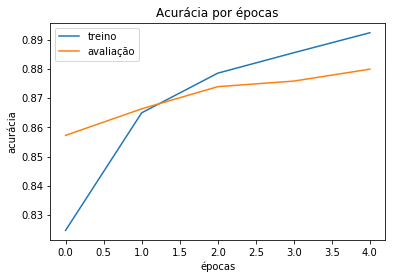

In [4]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

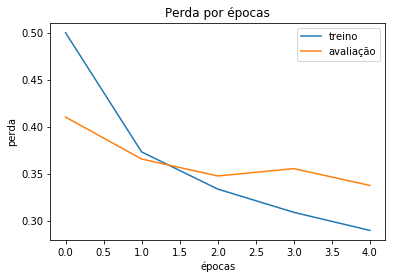

In [5]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

#### Quando os dados de treino estão melhores que os dados de avaliação, existe algo errado.. é necessário fazer tratamento..  mostrando que o modelo está ficando vicíado nos dados de teste.

In [10]:
testes = modelo.predict(imagens_teste)
print('resultado teste:',np.argmax(testes[50]))
print('número da imagem de teste:',identificacoes_teste[50])

resultado teste: 4
número da imagem de teste: 4


In [18]:
# vamos executar uma avaliação do nosso modelo

perda_teste,acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)   # ( perda, acuracia)

print('Perda do teste:',perda_teste)
print('Acuracia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 30us/sample - loss: 69.7668 - acc: 0.8414
Perda do teste: 69.76681628266573
Acuracia do teste: 0.8414


### Vamos utilizar outra técnica para melhorar os nossos dados.. vamos deixar alguns neuroneos dormentes

In [3]:
imagens_treino = imagens_treino/float(255) # Normalização da imagem

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), # porcentagem de neuronios dormentes
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy']) # variavel para saber o quanto estamos acertando 

historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2) # vamos aumentar a quantidade de vezes que o algoritimo passa pelas imagens 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 96us/sample - loss: 0.5297 - acc: 0.8122 - val_loss: 0.4466 - val_acc: 0.8434
Epoch 2/5
48000/48000 [==============================] - 5s 101us/sample - loss: 0.3981 - acc: 0.8569 - val_loss: 0.3897 - val_acc: 0.8571
Epoch 3/5
48000/48000 [==============================] - 4s 89us/sample - loss: 0.3578 - acc: 0.8678 - val_loss: 0.3597 - val_acc: 0.8704
Epoch 4/5
48000/48000 [==============================] - 4s 87us/sample - loss: 0.3407 - acc: 0.8749 - val_loss: 0.3527 - val_acc: 0.8705
Epoch 5/5
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3198 - acc: 0.8822 - val_loss: 0.3272 - val_acc: 0.8808


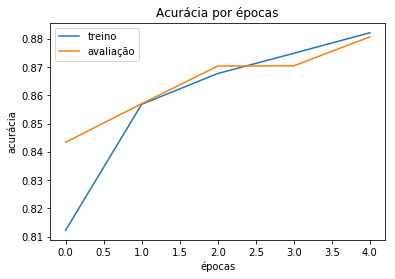

In [4]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

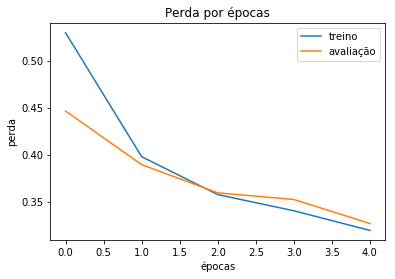

In [5]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

### Vamos salvar nosso modelo 

In [7]:
from tensorflow.keras.models import load_model

In [8]:
modelo.save('modelo.h5') # salva o modelo

modelo_salvo = load_model('modelo.h5') # importa o modelo 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# teste dos modelos:

testes = modelo.predict(imagens_teste)
print('resultado teste:',np.argmax(testes[1]))
print('número da imagem de teste:',identificacoes_teste[1])
print()

teste_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(teste_modelo_salvo[1]))
print('número da imagem de teste:',identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2

resultado teste modelo salvo: 2
número da imagem de teste: 2


### Organizando o código

Importar

In [ ]:
import tensorflow
from tensorflow import keras
from scipy import ndimage 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

Exibição dos dados

In [ ]:
total_de_classificacoes = 10
nome_de_classificacoes =['Camiseta',
'Calça','Pullover','Vestido','Casaco','Sandália',
'Camiseta','Tênis','Bolsa','Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [14]:
imagens_treino = imagens_treino/float(255)

Criando,copilando, treinando e normalizando com dropout o modelo

In [ ]:
#
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
                                               ])  

#
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])  

#
historico = modelo.fit(imagens_treino,identificacoes_treino,epochs=5, validation_split=0.2) 

Salvando e carregando o modelo

In [ ]:
modelo.save('modelo.h5') # salva o modelo

modelo_salvo = load_model('modelo.h5') # importa o modelo 

Visualizando as acurácias - Treino e Validação por época  

In [ ]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

Visualizando as perdas - Treino e Validação por época

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

Teste do modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:',np.argmax(testes[1]))
print('número da imagem de teste:',identificacoes_teste[1])
print()

teste_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(teste_modelo_salvo[1]))
print('número da imagem de teste:',identificacoes_teste[1])